<a href="https://colab.research.google.com/github/PedroH-07/Checkpoint1-SERS/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/household_power_consumption.txt'

# **01 - Carregue o dataset e exibe as 10 primeiras linhas**

In [ ]:
df.head(11)

## **02 diferença entre Global_active_power e Global_reactive_power**

Global_active_power: Esta coluna representa a potência ativa total consumida pela residência em quilowatts (kW). A potência ativa é a potência real que realiza trabalho útil, como acender lâmpadas, fazer funcionar motores, etc. É a energia que você realmente "usa" e pela qual paga na sua conta de eletricidade.

Global_reactive_power: Esta coluna representa a potência reativa total consumida pela residência em quilovolt-ampère reativo (kVAr). A potência reativa é a potência que não realiza trabalho útil diretamente, mas é necessária para criar campos magnéticos em equipamentos como motores, transformadores e reatores. Ela não é convertida em trabalho, mas é necessária para que a potência ativa possa ser entregue.

## **03 Verifique se tem valores ausentes e quantifique-os**

In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

# **04 Converta a coluna Date para o tipo datetime e cria uma nova coluna com o dia da semana correspondente**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()
display(df.head())

# **05 Filtre os registros apenas do ano 2007 e calcule a média de consumo diário de Gblobal_active_power**

In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]

daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007)

# **06. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**



In [ ]:
import matplotlib.pyplot as plt

date_to_plot = df['Date'].iloc[0]
df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title(f'Global Active Power Variation on {date_to_plot.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

# **07. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

In [ ]:
import matplotlib.pyplot as plt

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.grid(True)
plt.show()

# **08. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_power = df.groupby('Month')['Global_active_power'].mean()
display(monthly_avg_power)

# **09. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [ ]:
daily_power_sum = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_power_sum.idxmax()
highest_consumption_value = daily_power_sum.max()

print(f"O dia com maior consumo de energia ativa global é: {day_with_highest_consumption.strftime('%Y-%m-%d')}")
print(f"Valor do maior consumo: {highest_consumption_value:.2f} kW")

# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [ ]:
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Final de semana' if x in ['Saturday', 'Sunday'] else 'Dia de semana')

average_power_by_daytype = df.groupby('DayType')['Global_active_power'].mean()

display(average_power_by_daytype)

# ***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

In [ ]:
summer_months = [6, 7, 8]
df_summer = df[df['Date'].dt.month.isin(summer_months)]

average_power_summer = df_summer['Global_active_power'].mean()

winter_months = [12, 1, 2]
df_winter = df[df['Date'].dt.month.isin(winter_months)]

average_power_winter = df_winter['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão (Hemisfério Norte): {average_power_summer:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno (Hemisfério Norte): {average_power_winter:.2f} kW")

# ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***

In [ ]:
df_sample = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.title('Distribuição da Potência Ativa Global (Full Dataset)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df_sample['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.title('Distribuição da Potência Ativa Global (Amostra de 1%)')
plt.grid(True)

plt.tight_layout()

# ***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.***



In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

# ***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.***

In [ ]:
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()
display(daily_consumption.head())

In [ ]:
daily_power = daily_consumption['Global_active_power']

X = daily_power.values.reshape(-1, 1)

print(f"Formato dos dados para K-means: {X.shape}")

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X)

In [ ]:
daily_consumption['Cluster'] = kmeans.labels_
display(daily_consumption.head())

In [ ]:
average_consumption_per_cluster = daily_consumption.groupby('Cluster')['Global_active_power'].mean()

print("Potência Ativa Global Média por Cluster:")
display(average_consumption_per_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(daily_consumption.index, daily_consumption['Global_active_power'], c=daily_consumption['Cluster'], cmap='viridis')
plt.xlabel('Índice de Dias')
plt.ylabel('Global Active Power (kW)')
plt.title('Agrupamento K-means do Consumo Diário de Potência Ativa Global')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.*`**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = '2007-01-01'
end_date = '2007-06-30'

df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

display(df_period.head())

In [ ]:
df_period['Datetime'] = pd.to_datetime(df_period['Date'].astype(str) + ' ' + df_period['Time'])
df_period.set_index('Datetime', inplace=True)

daily_power_series = df_period['Global_active_power'].resample('D').mean()

display(daily_power_series.head())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_power_series_filled = daily_power_series.interpolate()

decomposition = seasonal_decompose(daily_power_series_filled, model='additive', period=7)

In [ ]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Decomposição da Série Temporal da Potência Ativa Global Diária (6 Meses)', y=1.02)
plt.show()

# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***

In [ ]:
X = df[['Global_intensity']]
y = df['Global_active_power']

display(X.head())
display(y.head())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

print("Primeiras 5 previsões:")
print(y_pred[:5])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"R-quadrado (R2): {r2:.4f}")

# ***21***

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
display(df.head())

In [ ]:
df_hourly = df['Global_active_power'].resample('H').mean()
display(df_hourly.head())

In [ ]:
df_hourly = df['Global_active_power'].resample('H').mean()
hourly_avg_power = df_hourly.groupby(df_hourly.index.hour).mean()
peak_hours = hourly_avg_power.sort_values(ascending=False)
display(peak_hours)

# ***22***

In [ ]:
from statsmodels.tsa.stattools import acf

autocorr_lag1 = acf(df_hourly, nlags=1)[1]

autocorr_lag24 = acf(df_hourly, nlags=24)[24]

autocorr_lag48 = acf(df_hourly, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

In [ ]:
from statsmodels.tsa.stattools import acf

autocorr_lag1 = acf(df_hourly, nlags=1)[1]

autocorr_lag24 = acf(df_hourly, nlags=24)[24]

autocorr_lag48 = acf(df_hourly, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

In [ ]:
df_hourly_filled = df_hourly.interpolate(method='linear')

autocorr_lag1 = acf(df_hourly_filled, nlags=1)[1]

autocorr_lag24 = acf(df_hourly_filled, nlags=24)[24]

autocorr_lag48 = acf(df_hourly_filled, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

In [ ]:
print("Interpretação dos Valores de Autocorrelação:")
print(f"- Autocorrelação no atraso de 1 horas ({autocorr_lag1:.4f}): Esse valor é relativamente alto e positivo. Ele indica uma forte correlação positiva entre o consumo de potência ativa global em uma determinada hora e o consumo na hora anterior. Isso sugere que o consumo de energia tende a ser semelhante de uma hora para a outra.")
print(f"- Autocorrelação no atraso de 24 horas ({autocorr_lag24:.4f}): Esse valor também é positivo e moderadamente alto, embora menor do que no atraso de 1 hora. Uma autocorrelação positiva no atraso de 24 horas sugere uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo exatamente 24 horas antes (a mesma hora no dia anterior). Isso é um forte indicador de um padrão diário repetitivo no consumo de energia.")
print(f"- Autocorrelação no atraso de 48 horas ({autocorr_lag48:.4f}): Esse valor é positivo, mas um pouco menor do que no atraso de 24 horas. Ele indica uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo 48 horas antes (a mesma hora dois dias antes). O fato de ainda ser positivo e relativamente alto reforça a presença de padrões recorrentes, embora potencialmente com uma correlação um pouco menos forte do que o atraso diário imediato.")

print("\nConclusão:")
print("Com base nos valores de autocorrelação, particularmente o valor positivo significativo no atraso de 24 horas, existem padrões diários repetitivos evidentes na série temporal de Potência Ativa Global. O consumo de energia tende a seguir um padrão semelhante a cada dia, com o consumo em uma hora específica estando positivamente correlacionado com o consumo na mesma hora do dia anterior.")

# ***Pergunta: existem padrões repetidos diariamente?***


Com base nos valores de autocorrelação, particularmente o valor positivo significativo no lag de 24 horas, existem padrões diários repetidos notáveis na série temporal de Global_active_power. O consumo de energia tende a seguir um padrão semelhante a cada dia, com o consumo em uma hora específica sendo positivamente correlacionado com o consumo na mesma hora do dia anterior.

# ***23***

In [ ]:
features = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
display(features.head())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

df_pca = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
display(df_pca.head())

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporção da variância explicada de cada componente:")
print(explained_variance_ratio)

cumulative_explained_variance = explained_variance_ratio.sum()
print(f"\nProporção acumulada da variância explicada pelos dois primeiros componentes: {cumulative_explained_variance:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=1)
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.title('PCA dos Dados de Consumo de Energia (2 Componentes)')
plt.grid(True)
plt.show()

# ***24***

In [ ]:
daily_consumption_indexed = daily_consumption.set_index('Data')

df['Cluster'] = df.index.normalize().map(daily_consumption_indexed['Cluster'])

df_pca = df_pca.set_index(df.index)
df_pca['Cluster'] = df['Cluster']

df_pca.dropna(subset=['Cluster'], inplace=True)

df_pca['Cluster'] = df_pca['Cluster'].astype(int)

display(df_pca.head())

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=1, alpha=0.5)
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.title('Clusters de K-means no Espaço PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***Os grupos se separam?***

Observando o gráfico de dispersão dos clusters de K-means no espaço ACP, os grupos não parecem estar claramente separados. Há uma sobreposição significativa entre os clusters, sugerindo que as características usadas para o agrupamento, quando reduzidas a dois componentes principais, não diferenciam os grupos de forma distinta.

# ***25***

In [ ]:
from sklearn.model_selection import train_test_split

features_voltage = df[['Voltage']]
target_power = df['Global_active_power']

X_train_voltage, X_test_voltage, y_train_power, y_test_power = train_test_split(
    features_voltage, target_power, test_size=0.2, random_state=42
)

print(f"Formato de X_train_voltage: {X_train_voltage.shape}")
print(f"Formato de X_test_voltage: {X_test_voltage.shape}")
print(f"Formato de y_train_power: {y_train_power.shape}")
print(f"Formato de y_test_power: {y_test_power.shape}")

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_voltage, y_train_power)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)

X_train_voltage_poly = poly_features.fit_transform(X_train_voltage)
X_test_voltage_poly = poly_features.transform(X_test_voltage)

poly_model = LinearRegression()
poly_model.fit(X_train_voltage_poly, y_train_power)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_linear = linear_model.predict(X_test_voltage)

rmse_linear = np.sqrt(mean_squared_error(y_test_power, y_pred_linear))

y_pred_poly = poly_model.predict(X_test_voltage_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_power, y_pred_poly))

print(f"Raiz do Erro Quadrático Médio (RMSE) para o Modelo Linear: {rmse_linear:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE) para o Modelo Polinomial: {rmse_poly:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_test_voltage, y_test_power, alpha=0.5, s=1, label='Original Data')

X_test_voltage_sorted = X_test_voltage.sort_values(by='Voltage')

y_pred_linear_sorted = linear_model.predict(X_test_voltage_sorted)

X_test_voltage_sorted_poly = poly_features.transform(X_test_voltage_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_voltage_sorted_poly)

plt.plot(X_test_voltage_sorted, y_pred_linear_sorted, color='red', label='Linear Fit')

plt.plot(X_test_voltage_sorted, y_pred_poly_sorted, color='green', label='Polynomial Fit')

plt.xlabel('Tensão (V)')
plt.ylabel('Potência Ativa Global (kW)')
plt.title('Ajuste de Regressão Linear vs Polinomial em Tensão e Potência Ativa Global')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Comparação do Desempenho dos Modelos (RMSE):")
print(f"RMSE do Modelo Linear: {rmse_linear:.4f}")
print(f"RMSE do Modelo Polinomial: {rmse_poly:.4f}")

if rmse_poly < rmse_linear:
    print("\nO modelo de Regressão Polinomial apresenta um RMSE menor e fornece um ajuste ligeiramente melhor com base nessa métrica.")
elif rmse_linear < rmse_poly:
    print("\nO modelo de Regressão Linear apresenta um RMSE menor e fornece um ajuste ligeiramente melhor com base nessa métrica.")
else:
    print("\nAmbos os modelos possuem o mesmo RMSE.")

print("\nInterpretação Visual das Curvas Ajustadas:")
print("Observando o gráfico, o modelo de regressão linear ajusta uma linha reta aos dados. Essa linha captura a tendência geral, mas não acompanha as nuances da distribuição dos dados.")
print("O modelo de regressão polinomial (grau 2) ajusta uma curva aos dados. Essa curva parece seguir a distribuição dos pontos de dados mais de perto do que a linha reta, especialmente em áreas onde os dados apresentam uma leve curvatura.")
print("Com base na inspeção visual, o modelo polinomial parece capturar melhor a relação entre Tensão e Potência Ativa Global do que o modelo linear simples.")

print("\nConclusão Geral:")
print("Tanto as avaliações quantitativas (RMSE) quanto qualitativas (visuais) sugerem que o modelo de regressão polinomial fornece um ajuste ligeiramente melhor aos dados para prever a Potência Ativa Global com base na Tensão, em comparação com o modelo linear simples. O valor menor de RMSE e a curva com melhor ajuste visual indicam que a incorporação de um termo polinomial para a Tensão melhora a capacidade do modelo de capturar o padrão subjacente.")

# **26.** Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e describe()).

In [1]:
import zipfile
import pandas as pd

with zipfile.ZipFile('/content/appliances+energy+prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

try:
    df_energy = pd.read_csv('/content/energydata_complete.csv')
except FileNotFoundError:
    print("Error: 'energydata_complete.csv' not found after extraction. Please check the zip file contents.")
    import os
    print("Contents of /content/:", os.listdir('/content/'))

display(df_energy.info())

display(df_energy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

None

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# **27.** Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

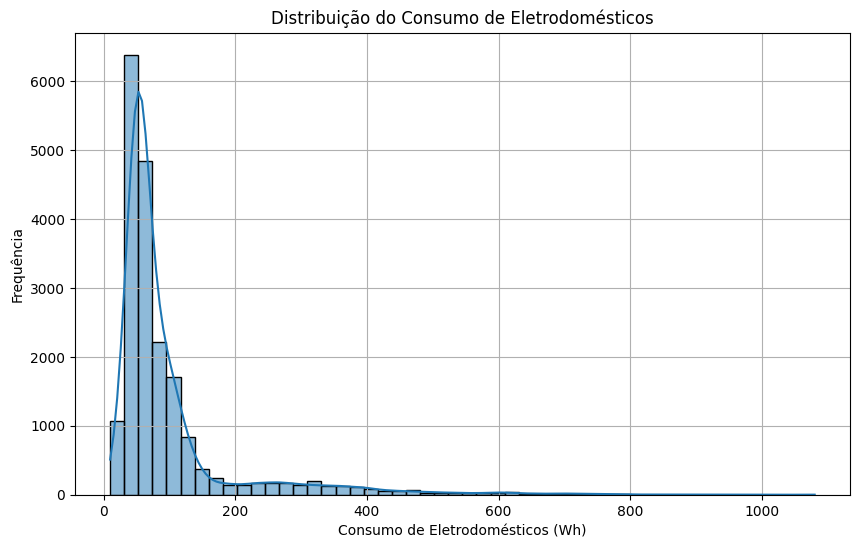

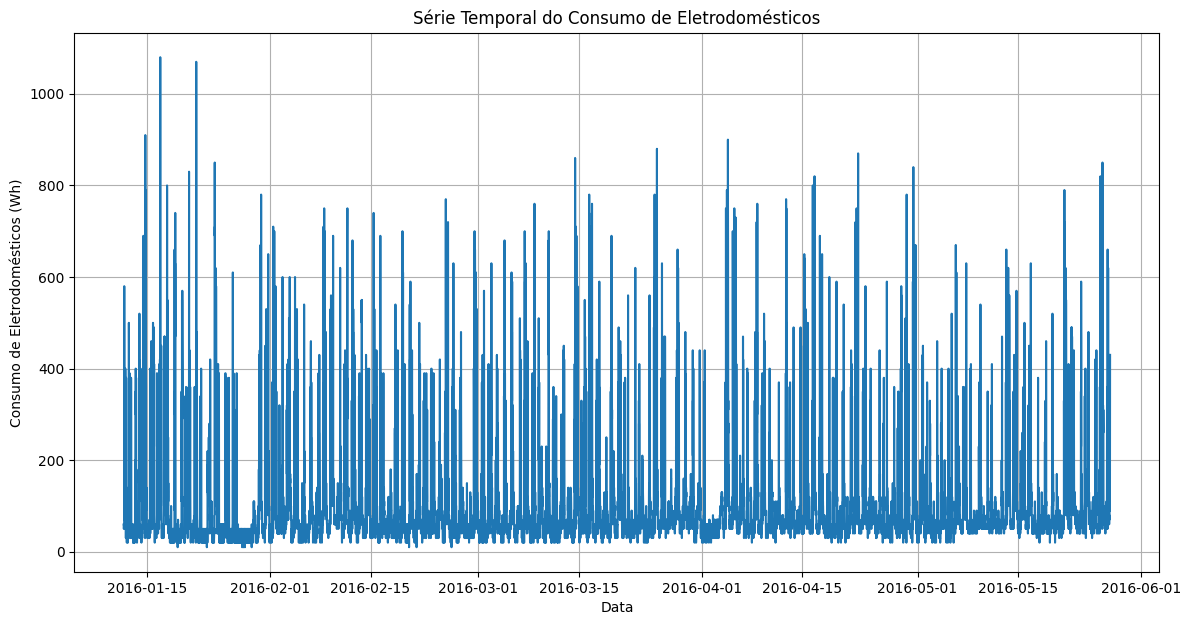


Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
Observando o histograma, a maior frequência de consumo de eletrodomésticos está concentrada em valores baixos.
A distribuição é assimétrica à direita, com uma longa cauda para valores mais altos, indicando que ocorrem picos de consumo, mas são menos frequentes.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_energy['Appliances'], bins=50, kde=True)
plt.xlabel('Consumo de Eletrodomésticos (Wh)')
plt.ylabel('Frequência')
plt.title('Distribuição do Consumo de Eletrodomésticos')
plt.grid(True)
plt.show()

df_energy['date'] = pd.to_datetime(df_energy['date'])
df_energy.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df_energy.index, df_energy['Appliances'])
plt.xlabel('Data')
plt.ylabel('Consumo de Eletrodomésticos (Wh)')
plt.title('Série Temporal do Consumo de Eletrodomésticos')
plt.grid(True)
plt.show()

print("\nPergunta: o consumo tende a se concentrar em valores baixos ou altos?")
print("Observando o histograma, a maior frequência de consumo de eletrodomésticos está concentrada em valores baixos.")
print("A distribuição é assimétrica à direita, com uma longa cauda para valores mais altos, indicando que ocorrem picos de consumo, mas são menos frequentes.")

# **28.** Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [3]:
correlation_matrix = df_energy.corr(numeric_only=True)

appliance_correlations = correlation_matrix['Appliances'].sort_values(ascending=False)

temperature_cols = [col for col in df_energy.columns if 'T' in col and col != 'T_out']
humidity_cols = [col for col in df_energy.columns if 'RH' in col]

relevant_correlations = appliance_correlations[temperature_cols + humidity_cols]

display(relevant_correlations)

print("\nPergunta: quais fatores têm mais relação com o consumo?")
print("Observando os valores de correlação, os fatores que parecem ter mais relação com o consumo de eletrodomésticos ('Appliances') são as variáveis de temperatura e umidade. Correlações mais próximas de 1 (positiva) ou -1 (negativa) indicam uma relação mais forte. Os valores apresentados acima mostram a força e a direção dessa relação para cada sensor de temperatura e umidade.")

,Appliances
T1,0.055447
T2,0.120073
T3,0.085060
T4,0.040281
T5,0.019760
T6,0.117638
T7,0.025801
T8,0.039572
T9,0.010010
Tdewpoint,0.015353



Pergunta: quais fatores têm mais relação com o consumo?
Observando os valores de correlação, os fatores que parecem ter mais relação com o consumo de eletrodomésticos ('Appliances') são as variáveis de temperatura e umidade. Correlações mais próximas de 1 (positiva) ou -1 (negativa) indicam uma relação mais forte. Os valores apresentados acima mostram a força e a direção dessa relação para cada sensor de temperatura e umidade.


# **29.** Normalização dos dados
- Aplique MIn-Max Scaling às variáveis numéricas
- Reutilize esses dados em modelos posteriores

In [4]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df_energy.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_energy_scaled = df_energy.copy()
df_energy_scaled[numerical_cols] = scaler.fit_transform(df_energy_scaled[numerical_cols])

display(df_energy_scaled.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


# **30.** PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

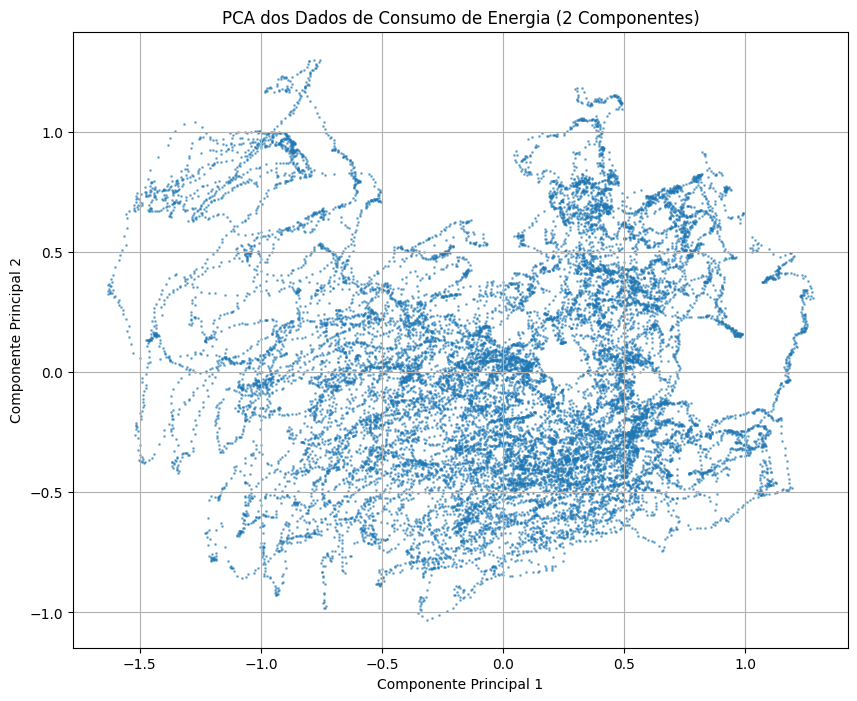


Pergunta: aparecem padrões ou agrupamentos naturais?
Observando o gráfico de dispersão da PCA, não parece haver agrupamentos naturais ou padrões distintos claramente visíveis com base nos dois primeiros componentes principais. Os dados parecem estar mais espalhados, embora possa haver alguma densidade maior em certas áreas, o que não configura grupos bem definidos apenas com base nesses dois componentes.


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_cols_for_pca = df_energy_scaled.select_dtypes(include=['float64', 'int64']).columns.drop(['Appliances', 'lights'])

pca = PCA(n_components=2, random_state=42)
df_pca = pd.DataFrame(pca.fit_transform(df_energy_scaled[numerical_cols_for_pca]), columns=['PC1', 'PC2'])

df_pca.index = df_energy_scaled.index

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados de Consumo de Energia (2 Componentes)')
plt.grid(True)
plt.show()

print("\nPergunta: aparecem padrões ou agrupamentos naturais?")
print("Observando o gráfico de dispersão da PCA, não parece haver agrupamentos naturais ou padrões distintos claramente visíveis com base nos dois primeiros componentes principais. Os dados parecem estar mais espalhados, embora possa haver alguma densidade maior em certas áreas, o que não configura grupos bem definidos apenas com base nesses dois componentes.")